In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [3]:
df=pd.read_csv("spam_sms.csv")

In [4]:
df=df[['v1','v2']]
df.columns=['label','message']

In [5]:
input=df['message']
target=df['label']

In [6]:
input

0      Go until jurong point, crazy.. Available only ...
1                          Ok lar... Joking wif u oni...
2      Free entry in 2 a wkly comp to win FA Cup fina...
3      U dun say so early hor... U c already then say...
4      Nah I don't think he goes to usf, he lives aro...
                             ...                        
107    How would my ip address test that considering ...
108    I know! Grumpy old people. My mom was like you...
109                       Dont worry. I guess he's busy.
110             What is the plural of the noun research?
111                      Going for dinner.msg you after.
Name: message, Length: 112, dtype: object

In [7]:
target

0       ham
1       ham
2      spam
3       ham
4       ham
       ... 
107     ham
108     ham
109     ham
110     ham
111     ham
Name: label, Length: 112, dtype: object

In [8]:
x_train,x_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.2,random_state=42)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X_train_vec=vectorizer.fit_transform(x_train)
X_test_vec=vectorizer.transform(x_test)

In [10]:
X_train_dense=X_train_vec.toarray()
X_test_dense=X_test_vec.toarray()

In [11]:
model=GaussianNB()
model.fit(X_train_dense,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
y_pred=model.predict(X_test_dense)

In [13]:
from sklearn.metrics import accuracy_score, classification_report

In [15]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.8695652173913043

Classification Report:
               precision    recall  f1-score   support

         ham       0.89      0.94      0.92        18
        spam       0.75      0.60      0.67         5

    accuracy                           0.87        23
   macro avg       0.82      0.77      0.79        23
weighted avg       0.86      0.87      0.86        23



In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

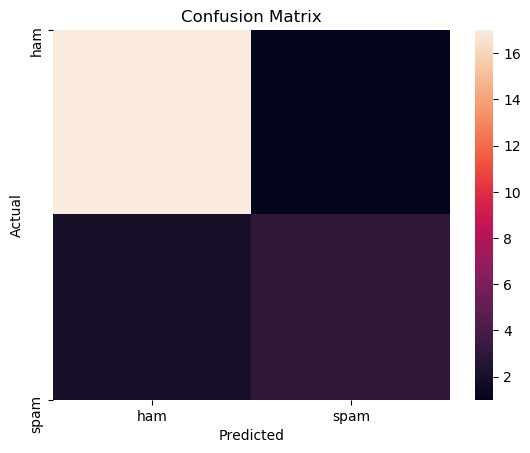

In [23]:
cm=confusion_matrix(y_test,y_pred,labels=['ham','spam'])
sn.heatmap(cm,xticklabels=['ham','spam'],yticklabels=['ham','spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()